In [1]:
# Get the data for expeirment
import sklearn
import pandas as pd 

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data\processed_wind.txt')
data

,Date,A_Air_temp,A_Precip,A_Syno_wind_speed,A_Syno_wind_dir,A_Avg_wind_speed,A_Avg_wind_dir,B_Air_temp,B_Precip,B_Syno_wind_speed,...,E_Syno_wind_speed,E_Syno_wind_dir,E_Avg_wind_speed,E_Avg_wind_dir,Test_Air_temp,Test_Precip,Test_Syno_wind_speed,Test_Syno_wind_dir,Test_Avg_wind_speed,Test_Avg_wind_dir
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-28.0,0.0,NaN,...,12.7,188.1,10.9,175.0,-26.4,0.0,8.3,183.1,8.5,186.0
1,2018-01-01 01:00:00,-26.8,0.0,10.1,190.0,9.9,196.0,-28.3,0.0,NaN,...,8.2,181.6,11.1,177.2,-26.9,0.0,9.3,175.7,8.3,171.6
2,2018-01-01 02:00:00,-26.7,0.0,10.4,215.0,9.0,206.0,-28.7,0.0,NaN,...,12.4,183.9,11.9,178.2,-27.1,0.0,9.6,173.6,9.0,172.3
3,2018-01-01 03:00:00,-26.8,0.0,11.2,211.0,11.6,210.0,-28.5,0.0,NaN,...,10.9,185.7,10.2,183.3,-27.3,0.0,6.6,174.0,8.3,172.8
4,2018-01-01 04:00:00,-27.0,0.0,5.4,230.0,8.1,214.0,-28.4,0.0,NaN,...,7.6,187.9,8.1,179.2,-27.7,0.0,9.0,169.3,8.4,167.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48373,2023-06-30 19:00:00,25.7,0.0,8.4,101.0,8.7,99.0,23.1,0.0,7.3,...,4.2,85.3,5.8,80.5,26.1,0.0,4.3,195.1,5.4,39.0
48374,2023-06-30 20:00:00,25.9,0.0,8.8,122.0,8.7,105.0,23.6,0.0,7.8,...,6.6,80.3,5.8,73.1,24.5,0.0,10.3,100.3,8.5,117.4
48375,2023-06-30 21:00:00,24.1,0.0,10.3,127.0,10.1,128.0,20.1,0.0,8.9,...,8.1,48.0,7.0,62.9,22.8,0.0,8.6,98.0,10.2,98.8
48376,2023-06-30 22:00:00,22.4,0.0,6.5,109.0,7.1,114.0,18.2,0.0,13.0,...,5.8,77.7,7.3,63.2,22.1,0.0,7.9,112.2,9.2,105.6


In [3]:
data.isnull().sum()

Date                        0
A_Air_temp                 15
A_Precip                   12
A_Syno_wind_speed          12
A_Syno_wind_dir          1155
A_Avg_wind_speed           15
A_Avg_wind_dir           1152
B_Air_temp                  2
B_Precip                    3
B_Syno_wind_speed       44707
B_Syno_wind_dir         44794
B_Avg_wind_speed        44707
B_Avg_wind_dir          44794
C_Air_temp                  1
C_Precip                    1
C_Syno_wind_speed          26
C_Syno_wind_dir         15142
C_Avg_wind_speed        48378
C_Avg_wind_dir          48378
D_Air_temp                  0
D_Precip                    0
D_Syno_wind_speed           0
D_Syno_wind_dir            61
D_Avg_wind_speed            1
D_Avg_wind_dir             61
E_Air_temp                  0
E_Precip                    0
E_Syno_wind_speed           0
E_Syno_wind_dir             2
E_Avg_wind_speed            0
E_Avg_wind_dir              2
Test_Air_temp               5
Test_Precip                 4
Test_Syno_

In [4]:
col_to_drop = [
    'B_Syno_wind_speed',
    'B_Syno_wind_dir',
    'B_Avg_wind_speed',
    'B_Avg_wind_dir',
    'C_Avg_wind_speed',
    'C_Avg_wind_dir'
]

processed_data = data.drop(columns=col_to_drop)

In [5]:
train, test = train_test_split(processed_data, test_size=0.3)

train = train.fillna(0)
test = test.fillna(0)

train_x = train.loc[:, [
    'A_Air_temp', 'A_Precip', 'A_Syno_wind_speed',
       'A_Syno_wind_dir', 'A_Avg_wind_speed', 'A_Avg_wind_dir', 'B_Air_temp',
       'B_Precip', 'C_Air_temp', 'C_Precip', 'C_Syno_wind_speed',
       'C_Syno_wind_dir', 'D_Air_temp', 'D_Precip', 'D_Syno_wind_speed',
       'D_Syno_wind_dir', 'D_Avg_wind_speed', 'D_Avg_wind_dir', 'E_Air_temp',
       'E_Precip', 'E_Syno_wind_speed', 'E_Syno_wind_dir', 'E_Avg_wind_speed',
       'E_Avg_wind_dir'
]] 
train_y = train.loc[:, [
    'Test_Avg_wind_speed',
      # 'Test_Avg_wind_dir'
]]

test_x = test.loc[:, [
    'A_Air_temp', 'A_Precip', 'A_Syno_wind_speed',
       'A_Syno_wind_dir', 'A_Avg_wind_speed', 'A_Avg_wind_dir', 'B_Air_temp',
       'B_Precip', 'C_Air_temp', 'C_Precip', 'C_Syno_wind_speed',
       'C_Syno_wind_dir', 'D_Air_temp', 'D_Precip', 'D_Syno_wind_speed',
       'D_Syno_wind_dir', 'D_Avg_wind_speed', 'D_Avg_wind_dir', 'E_Air_temp',
       'E_Precip', 'E_Syno_wind_speed', 'E_Syno_wind_dir', 'E_Avg_wind_speed',
       'E_Avg_wind_dir'
]] 
test_y = test.loc[:, [
    'Test_Avg_wind_speed',
      # 'Test_Avg_wind_dir'
]]


In [6]:
train.isnull().sum()

Date                    0
A_Air_temp              0
A_Precip                0
A_Syno_wind_speed       0
A_Syno_wind_dir         0
A_Avg_wind_speed        0
A_Avg_wind_dir          0
B_Air_temp              0
B_Precip                0
C_Air_temp              0
C_Precip                0
C_Syno_wind_speed       0
C_Syno_wind_dir         0
D_Air_temp              0
D_Precip                0
D_Syno_wind_speed       0
D_Syno_wind_dir         0
D_Avg_wind_speed        0
D_Avg_wind_dir          0
E_Air_temp              0
E_Precip                0
E_Syno_wind_speed       0
E_Syno_wind_dir         0
E_Avg_wind_speed        0
E_Avg_wind_dir          0
Test_Air_temp           0
Test_Precip             0
Test_Syno_wind_speed    0
Test_Syno_wind_dir      0
Test_Avg_wind_speed     0
Test_Avg_wind_dir       0
dtype: int64

In [7]:
# train.to_csv('Data/wind_train_data.txt', index = False)

# test.to_csv('Data/wind_test_data.txt', index = False)

In [9]:
from joblib import dump, load

In [10]:
reg = LinearRegression().fit(train_x, train_y)

pred = reg.predict(test_x)

rfScore=r2_score(test_y, pred)

print(rfScore)
print(mean_squared_error(test_y, pred))

0.8749120055809374
4.615363402717605


In [11]:
#dump(reg, 'linearWindModel.joblib') 

['linearWindModel.joblib']

In [18]:
regr = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes = (20,40, 10)).fit(train_x, train_y)
regr_pred = regr.predict(test_x)

rfScore=r2_score(test_y, regr_pred)


E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [20]:
#dump(regr, 'MlpWindModel.joblib') 

['MlpWindModel.joblib']

In [19]:
print(rfScore)
print(mean_squared_error(test_y, regr_pred))

0.882107131045691
4.349885337438746


In [21]:
rfr = RandomForestRegressor(max_depth=10, random_state=0)
rfr.fit(train_x.values, train_y)
rfr_pred = rfr.predict(test_x)
rfScore=r2_score(test_y, rfr_pred)

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [16]:
print(rfScore)
print(mean_squared_error(test_y, rfr_pred))

0.9006712086550861
3.6649278017333518


In [23]:
#dump(rfr, 'RuleWindModel.joblib') 

['RuleWindModel.joblib']

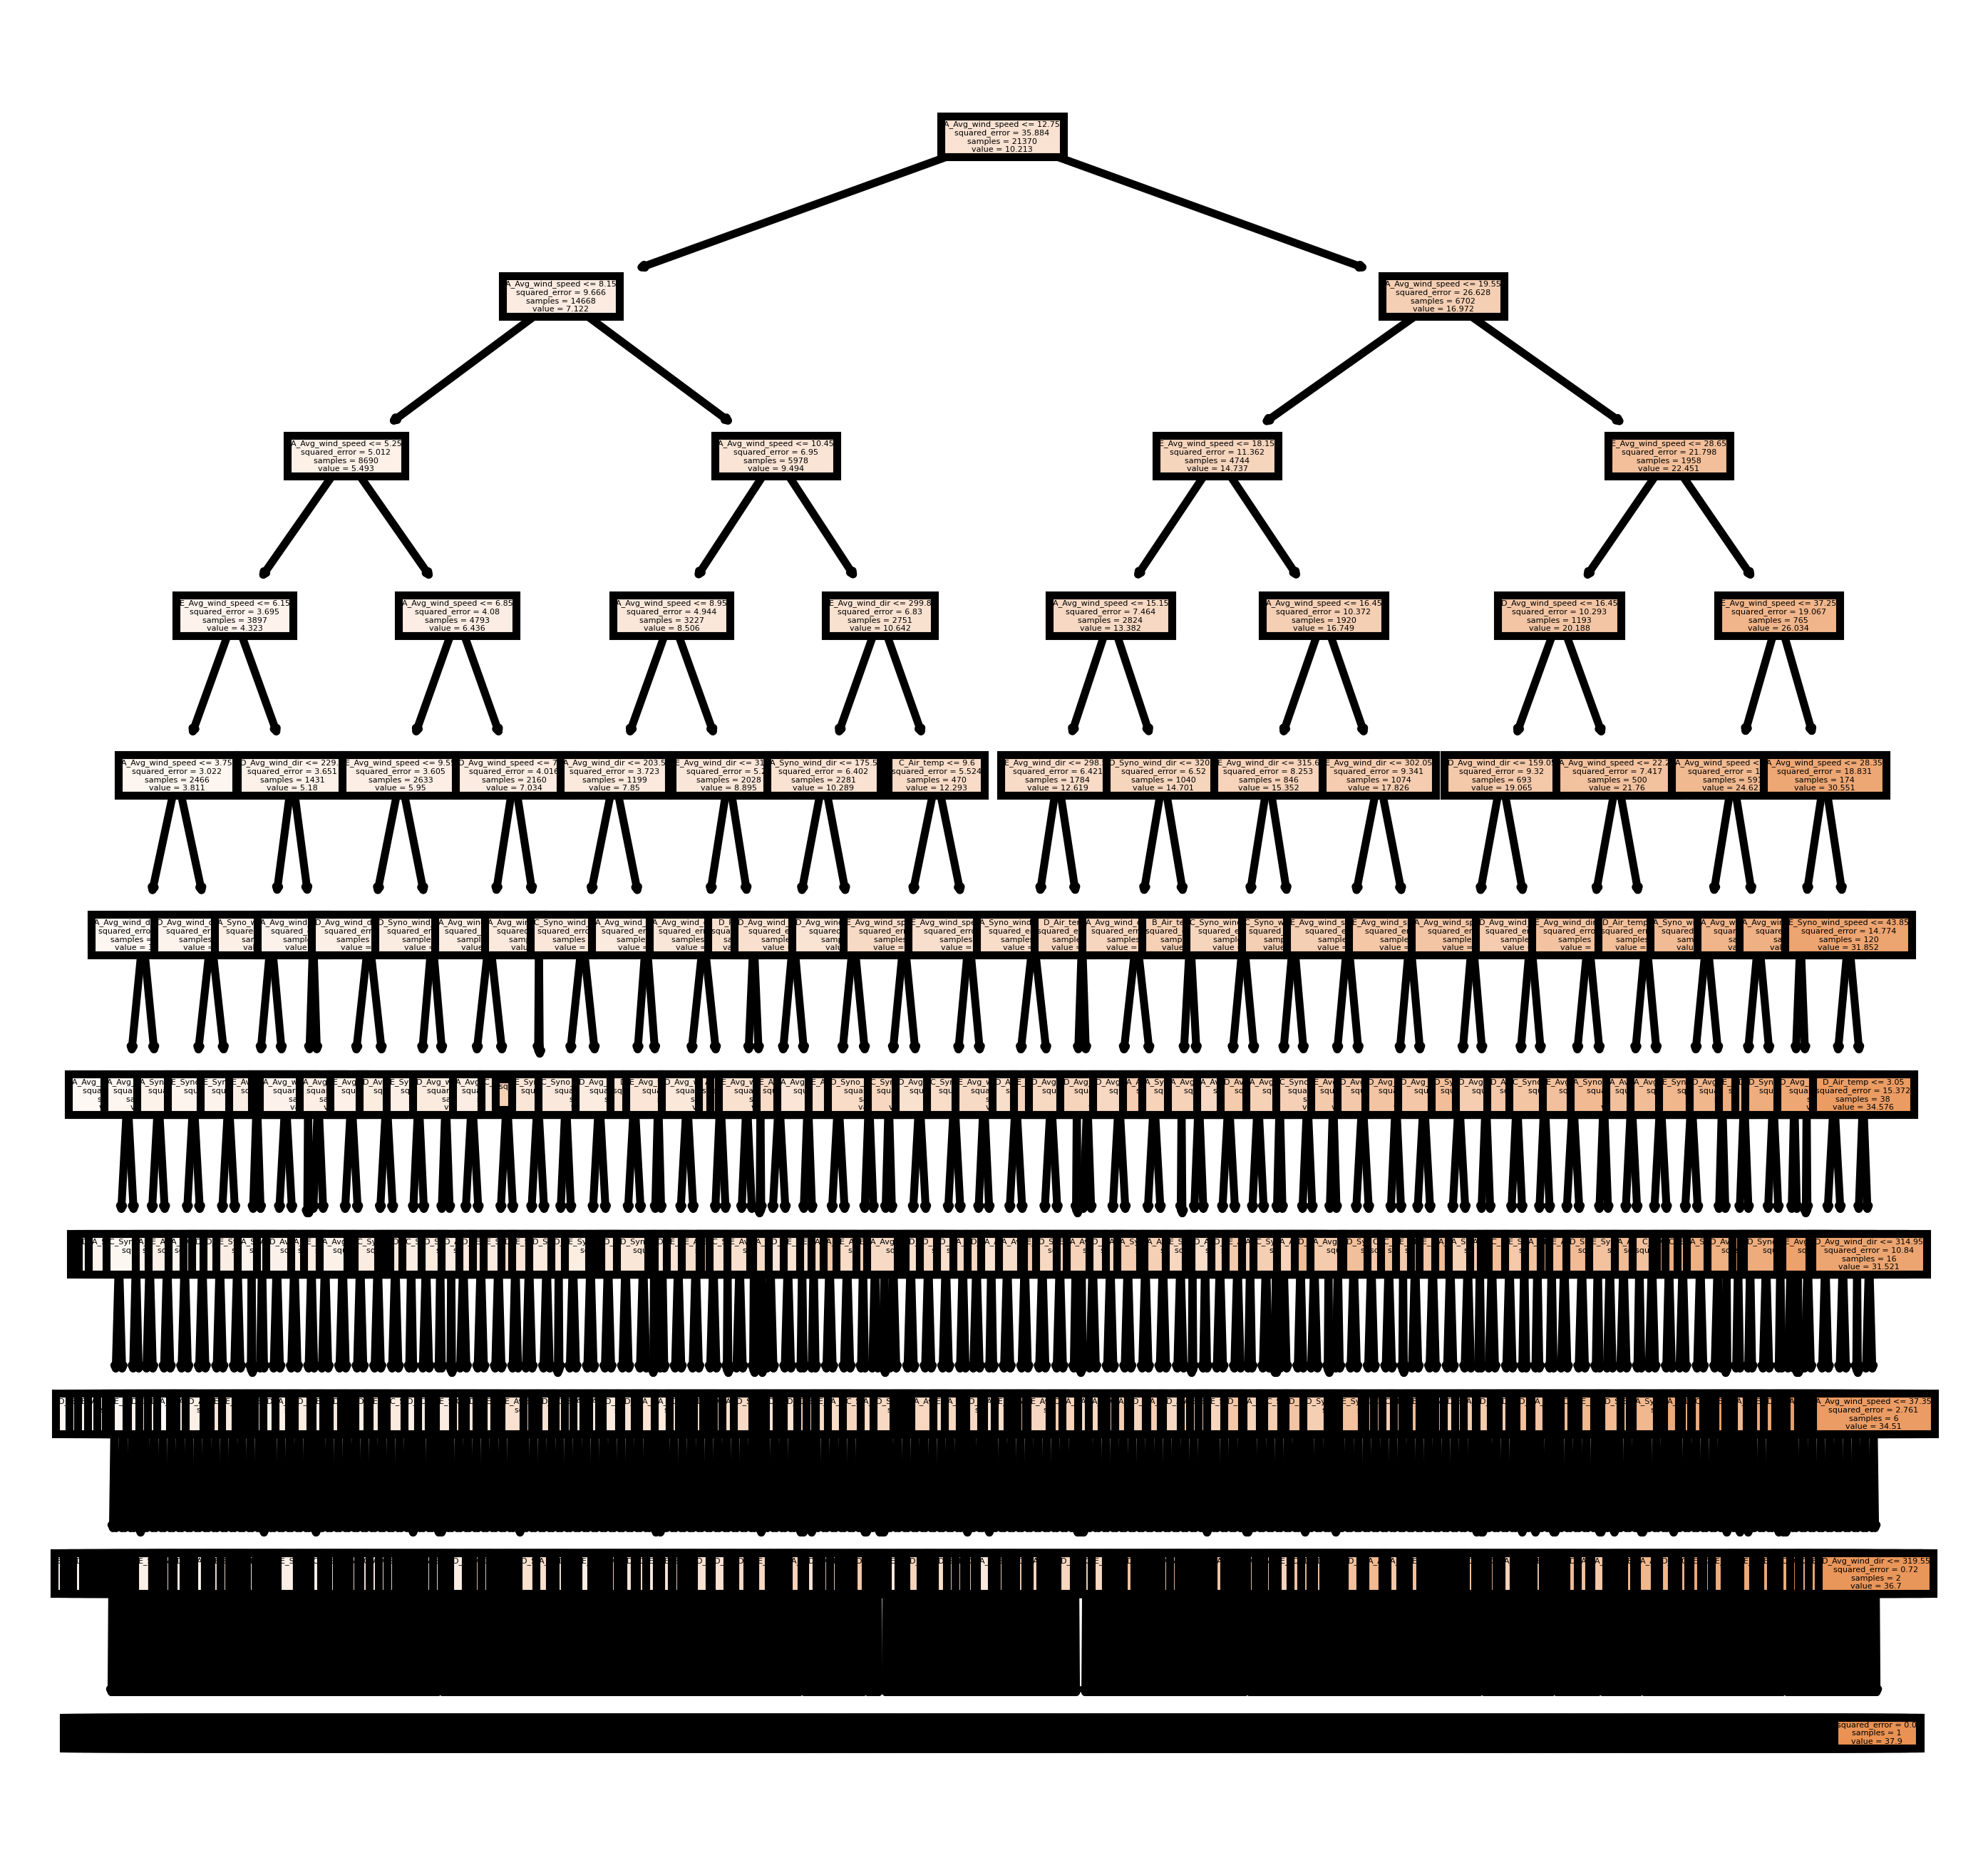

In [18]:
# Visulize the tree
# modified from source: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
fn = train_x.columns.tolist()
cn = train_y.columns.tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(rfr.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

C:\Users\PPL\AppData\Local\Temp\ipykernel_49364\2145561666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

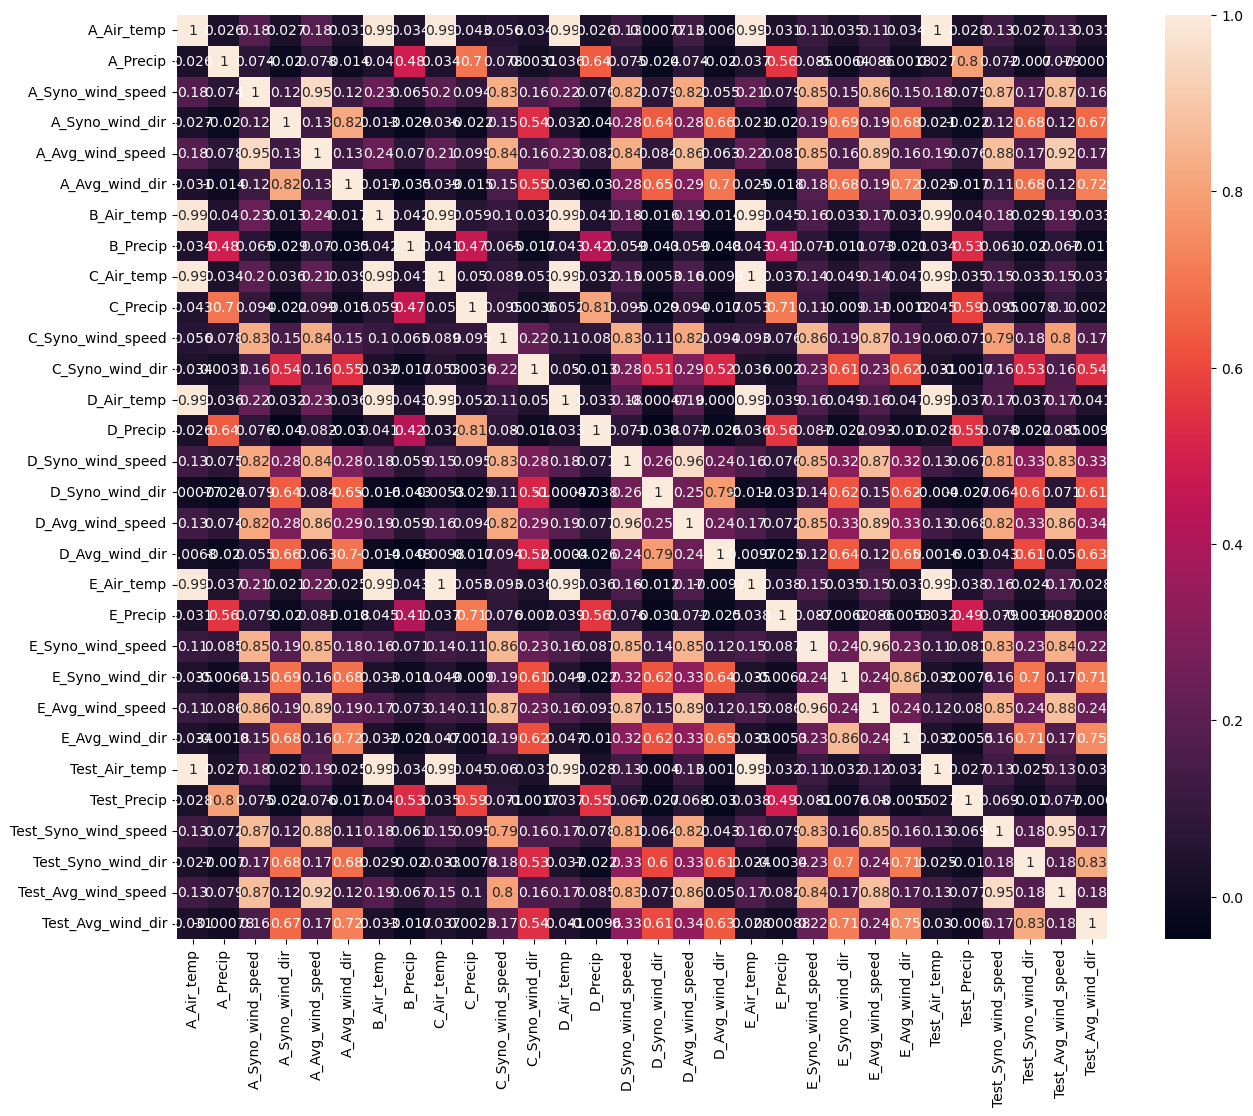

In [73]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True)